In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg
%matplotlib inline

# Read data files
ratings=pd.read_csv('ratings.csv', header=0)
ratings_test=pd.read_csv('ratings_test.csv', header=0)

/Users/mollyhanson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
ratings.columns=["UID","MovieID","Rating"]
ratings_test.columns=["UID","MovieID","Rating"]
ratings_test_pred = ratings_test["Rating"]

nomov = set(ratings_test['MovieID'])-set(ratings['MovieID'])

In [3]:
ratings = ratings.pivot(index='UID', columns='MovieID', values='Rating')
ratings.index.name=None

for i in nomov:
    ratings[i]=np.nan
    
ratings = ratings.sort(axis=1)

/Users/mollyhanson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [4]:
ratings = ratings.as_matrix()
ratings_test = ratings_test.as_matrix()

In [5]:
var = 0.25
d = 10
lam = 1
id_mat = np.identity(d)

In [6]:
#RUN 1
norm_u1 = np.random.multivariate_normal([0]*d, id_mat*lam, ratings.shape[0])
norm_v1 = np.random.multivariate_normal([0]*d, id_mat*lam, ratings.shape[1])

loss_list1 = []

for t in range(50):
    print t
    for i in range(943):
        j_total = 0
        vj_total = 0
        isValidUpdate=False
        for j in range(1682):
            if not np.isnan(ratings[i][j]):
                isValidUpdate=True
                j_total += np.matmul(norm_v1[j][np.newaxis].T,norm_v1[j][np.newaxis])
                vj_total += (ratings[i][j]*norm_v1[j])
        if isValidUpdate:
            j_total += (var*lam*id_mat)
            norm_u1[i] = np.dot(inv(j_total),vj_total)
        
    for i in range(1682):
        j_total = 0
        vj_total = 0
        isValidUpdate=False
        for j in range(943):
            if not np.isnan(ratings[j][i]):
                isValidUpdate=True
                j_total += np.matmul(norm_u1[j][np.newaxis].T,norm_u1[j][np.newaxis])
                vj_total += (ratings[j][i]*norm_u1[j])
        if isValidUpdate:
            j_total += (var*lam*id_mat)
            norm_v1[i] = np.dot(inv(j_total),vj_total)
    
    s=0
    usr=0
    mov=0
    for i in range(943):
        for j in range(1682):
            if not np.isnan(ratings[i][j]):
                s = s + (1/(2*var))*((ratings[i][j])-np.dot(norm_u1[i],norm_v1[j]))**2
    for i in range(943):
        usr = usr + (lam/2)*(linalg.norm(norm_u1[i]))**2
    for j in range(1682):
        mov = mov + (lam/2)*(linalg.norm(norm_v1[j]))**2

    loss = -s-usr-mov
    loss_list1.append(loss)

pred_list1 = []
for x in range(4999):
    userid = ratings_test[x][0]
    movid = ratings_test[x][1]
    u_val = norm_u1[userid-1][np.newaxis]
    v_val = norm_v1[movid-1][np.newaxis]
    pre = np.dot(u_val,v_val.T)
    pred_list1.append(pre[0][0])

RMSE1 = np.sqrt(np.mean((pred_list1-ratings_test_pred)**2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/Users/mollyhanson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mollyhanson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


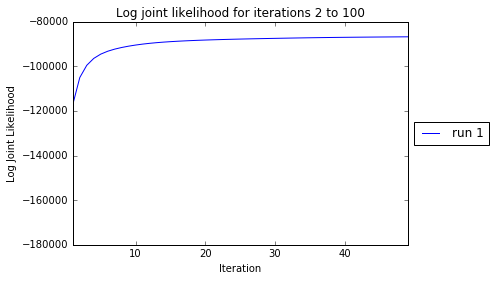

In [9]:
plt.plot(loss_list1,label='run 1')
plt.xlabel('Iteration')
plt.ylabel('Log Joint Likelihood')
plt.title('Log joint likelihood for iterations 2 to 100')
plt.xlim([1,49])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
print "run 1:: final loss=", loss_list1[49], ", RMSE=", RMSE1

 run 1:: final loss= -86814.3164589 , RMSE= 1.10671356208


In [13]:
## PART B

In [14]:
movieid=pd.read_csv('movies.txt', sep="\n", header = None)

In [15]:
from scipy.spatial import distance

In [17]:
#Star Wars

print "The 10 closest movies to:", movieid[0][49], "are...\n"

SW_dist_list = []
for j in range(1682):
    dist = distance.euclidean(norm_v1[49], norm_v1[j])
    SW_dist_list.append((dist,j))
    
sortSW = sorted(SW_dist_list)[1:11]

for i,j in sortSW:
    mov = movieid[0][j]
    dist = i
    print mov, "with Euclidean distance =", dist

The 10 closest movies to: Star Wars (1977) are...

Empire Strikes Back, The (1980) with Euclidean distance = 0.310141196857
Raiders of the Lost Ark (1981) with Euclidean distance = 0.633934580747
Return of the Jedi (1983) with Euclidean distance = 0.685003808635
Usual Suspects, The (1995) with Euclidean distance = 0.980990752169
Indiana Jones and the Last Crusade (1989) with Euclidean distance = 0.987065778881
Toy Story (1995) with Euclidean distance = 1.01380179106
Princess Bride, The (1987) with Euclidean distance = 1.04413653614
Searching for Bobby Fischer (1993) with Euclidean distance = 1.05606929896
Terminator, The (1984) with Euclidean distance = 1.079516329
Patton (1970) with Euclidean distance = 1.09265999516


In [18]:
#My Fair Lady

print "The 10 closest movies to:", movieid[0][484], "are...\n"

MFL_dist_list = []
for j in range(1682):
    dist = distance.euclidean(norm_v1[484], norm_v1[j])
    MFL_dist_list.append((dist,j))
    
sortMFL = sorted(MFL_dist_list)[1:11]

for i,j in sortMFL:
    mov = movieid[0][j]
    dist = i
    print mov, "with Euclidean distance =", dist

The 10 closest movies to: My Fair Lady (1964) are...

Mary Poppins (1964) with Euclidean distance = 0.634949662599
Singin' in the Rain (1952) with Euclidean distance = 0.853370792821
Snow White and the Seven Dwarfs (1937) with Euclidean distance = 0.87462748296
Affair to Remember, An (1957) with Euclidean distance = 0.886004761035
American in Paris, An (1951) with Euclidean distance = 0.886415119304
Cinderella (1950) with Euclidean distance = 0.90350822396
Sound of Music, The (1965) with Euclidean distance = 0.905992959062
Victor/Victoria (1982) with Euclidean distance = 0.90615286875
Philadelphia Story, The (1940) with Euclidean distance = 0.960559646802
Guantanamera (1994) with Euclidean distance = 0.970672245905


In [19]:
#Goodfellas

print "The 10 closest movies to:", movieid[0][181], "are...\n"

GF_dist_list = []
for j in range(1682):
    dist = distance.euclidean(norm_v1[181], norm_v1[j])
    GF_dist_list.append((dist,j))
    
sortGF = sorted(GF_dist_list)[1:11]

for i,j in sortGF:
    mov = movieid[0][j]
    dist = i
    print mov, "with Euclidean distance =", dist

The 10 closest movies to: GoodFellas (1990) are...

2001: A Space Odyssey (1968) with Euclidean distance = 0.650952354379
Bonnie and Clyde (1967) with Euclidean distance = 0.675271331445
Once Upon a Time in the West (1969) with Euclidean distance = 0.746634243292
Pulp Fiction (1994) with Euclidean distance = 0.760227983775
Raising Arizona (1987) with Euclidean distance = 0.76547646862
Casino (1995) with Euclidean distance = 0.782363994203
Full Metal Jacket (1987) with Euclidean distance = 0.833648853909
Cool Hand Luke (1967) with Euclidean distance = 0.841918102169
Short Cuts (1993) with Euclidean distance = 0.883272040339
Body Snatcher, The (1945) with Euclidean distance = 0.888389754337
